<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Coloma%2C_Orbe%2C_Posso_Deber_Progreso_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidad de Las Americas
<h3>Modelos y Simulación ACI650</h3>
PARALELO 1 (Viernes 17h50-19h50)

**Integrantes:** Kevin Coloma, Fernando Orbe, Martin Posso

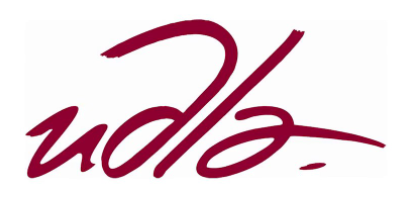

#**Deberes progreso 3**
<h3>Final project (due date: 25-july-2021)</h3>
<h4>Model a random walk on graph</h4>
Download the graph data (edge list) in the following link https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/graph_ms202120.csv

The graph is undirected, that is if the edge i-->j exists, the connection j-->i is also present. Consider this when reading the graph data in the csv.
Below you can see the adjacency matrix of the graph (left), and the graph with circular layout (center) and Kamada–Kawai layout (right).

In [ ]:
#Variable Initialization
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import Counter
import seaborn as sns;
import itertools

#(5%) Visualize the graph (replicate the figure above).
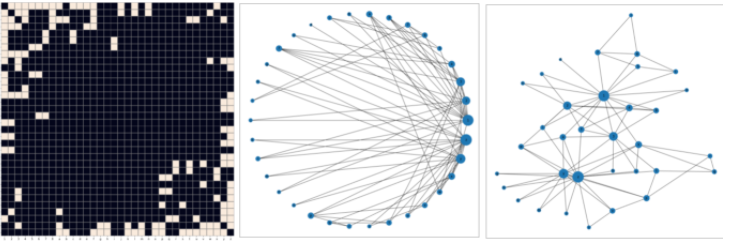

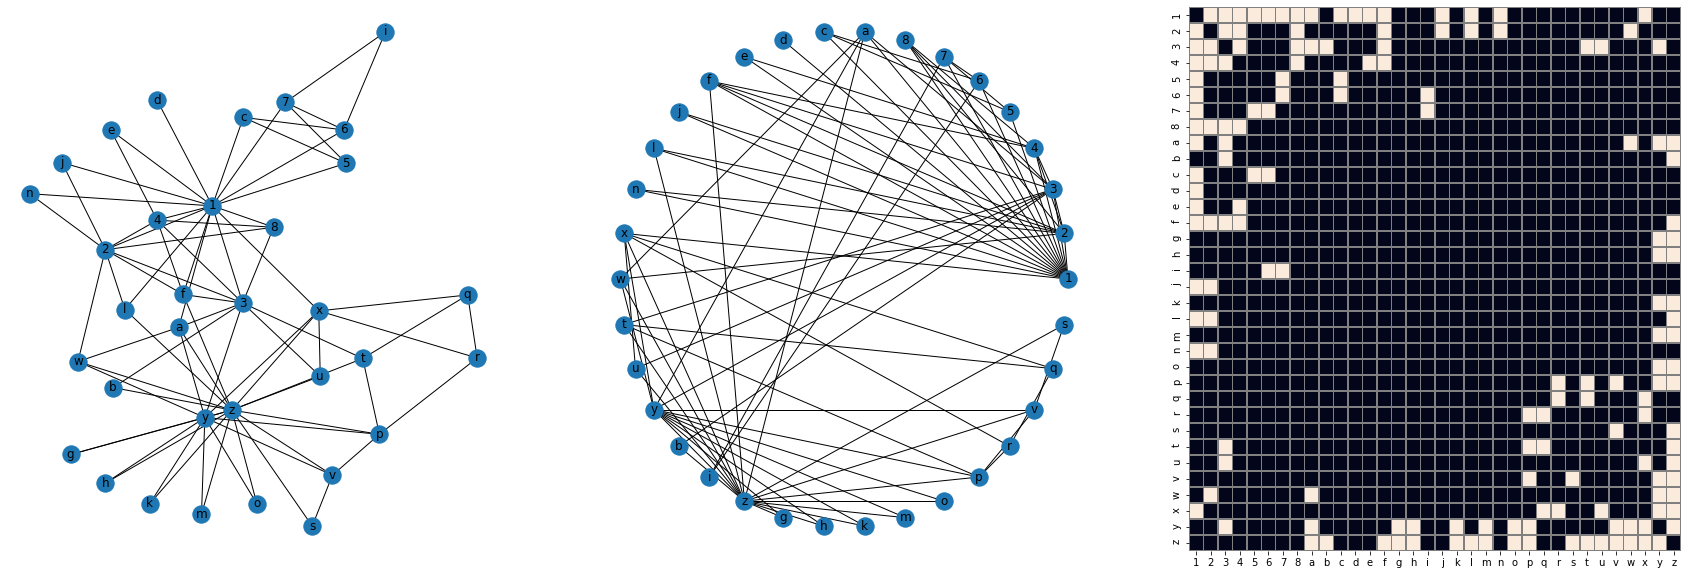

In [ ]:
#First Step is to read the CSV from the Github Link
columns = ['from', 'to'] #we set the columns names that we'll be using
df = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/graph_ms202120.csv', usecols=columns) #we read our CSV with pandas
df.columns = df.columns.astype(str)
G = nx.from_pandas_edgelist(df, source='from', target='to') #then we transform our dataframe into a graph using networkx
A = nx.adjacency_matrix(G).todense() #here we transform our graph into an adjacency matrix

Nodes_List = list(G.nodes) #we get the nodes list


Matrix = pd.DataFrame(A, index = G.nodes, columns = G.nodes) #we transform our previous adjacency matrix into a new dataframe so we can plot a heatmap using seaborn
Matrix = Matrix.sort_index(axis=1) #we sort our Matrix dataframe
Matrix = Matrix.sort_index()

#here we plot our graphs
#first graph using Kamada Kawai Layout
f = plt.figure(figsize=(30, 10))
f.add_subplot(131)
nx.draw_kamada_kawai(G, with_labels=True)

#Second graph using Circular Layout
f.add_subplot(132)
nx.draw_circular(G, with_labels=True)

#Third graph it is our Adjacency Matrix using seaborn's HeatMap
f.add_subplot(133)
ax = sns.heatmap(Matrix, linewidths=0.5, linecolor='gray', cbar=None)

#(10%) Build a random walk on the graph, and identify the node importance in the graph.
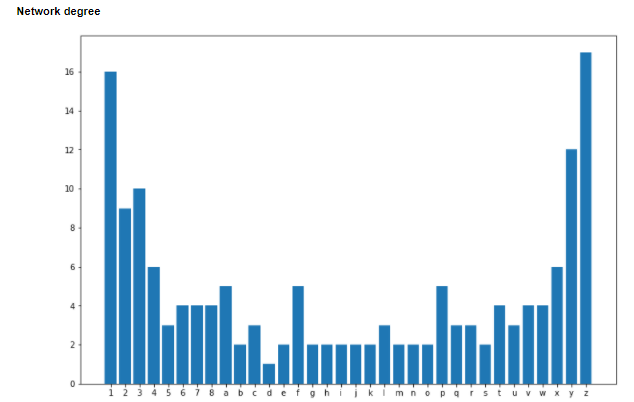

In [ ]:
#function to generate a random walk from any given node
def random_walk(start_node = 'a'):
    prev_node = start_node #we set our prev node to our start node so we can keep track of the walk
    n_steps = 0 #count for the number of steps given
    nodes = [] #array to store all chosen nodes for the random walk
    while True: #loop
        Neighbors = [] #list of Neighbors that node has
        nodes.append(prev_node) #we store our prev node
        Neighbors = list(G.neighbors(prev_node)) #then we choose a random neighbor
        Neighbors.append('0')
        node = random.choice(Neighbors)
        if node == '0': #if to check if the walk has ended
            break
        else: #continues if it hasn't ended
            n_steps += 1 #we count the number of steps
            prev_node = node
    return n_steps, nodes

In [ ]:
random_walk('p')

(5, ['p', 'r', 'p', 'r', 'x', 'u'])

In [ ]:
#function to get the Network degree from the Graph
def Network_Degree(n = 100):
  paths = []
  counts = [0] * 34
  #add all paths from simulation
  for letter in sorted(list(G.nodes)): #loop to add our path generated from the random walk
    for i in range(n): #loop for {x} number of simulations
      n_steps, nodes = random_walk(letter) # we generate our walk
      if (nodes): #add to our array if the list of nodes it is not empty
        paths.append(nodes)

  ocurrences = Counter(i for i in itertools.chain.from_iterable(np.unique(paths))) #we use a Counter to check if it has occurrences in our paths generate from our simulation
  View_Degree = sorted(ocurrences.items()) #we sort our ocurrences

  xDegree = [] #variables to store our sorted items (x)
  yDegree = [] #variables to store our sorted items (y)

  for x, y in View_Degree: #for to append our x and y values
    xDegree.append(x) #store our x values
    yDegree.append(y) #store our y values

  #We plot our bar graph in order to visualize the network degree.
  plt.figure(figsize=(10, 7))
  plt.title("Network Degree")
  plt.bar(xDegree, yDegree)
  print(ocurrences)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Counter({'z': 153870, '1': 144621, 'y': 109522, '3': 95862, '2': 84867, '4': 58229, 'x': 56404, 'f': 50825, 'a': 50603, 'p': 46972, '8': 40747, 'w': 40420, 't': 38103, 'v': 37369, '7': 33320, '6': 33198, 'l': 30728, 'u': 30272, 'r': 26885, 'q': 26595, '5': 26380, 'c': 26245, 'b': 21251, 'k': 20779, 'o': 20776, 'h': 20707, 'j': 20654, 'm': 20646, 'g': 20618, 'n': 20397, 'e': 20357, 's': 19388, 'i': 15862, 'd': 10648})


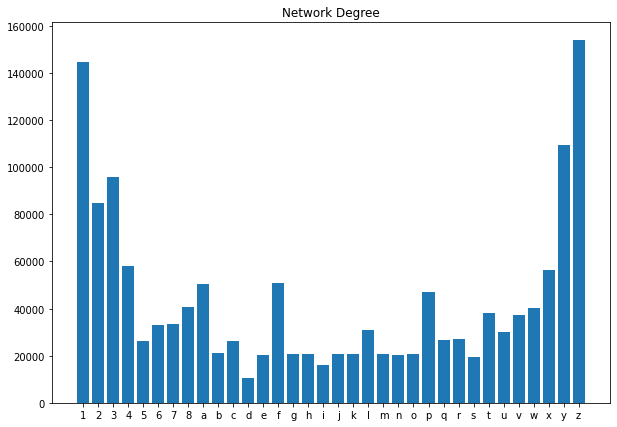

In [ ]:
Network_Degree(10000)

#Find all shortest path occurring in the simulated random walk
* (10%) Return the distance matrix from the random walk

* (10%) Return all shortest path for the matrix distances above (from the simulated random walk).

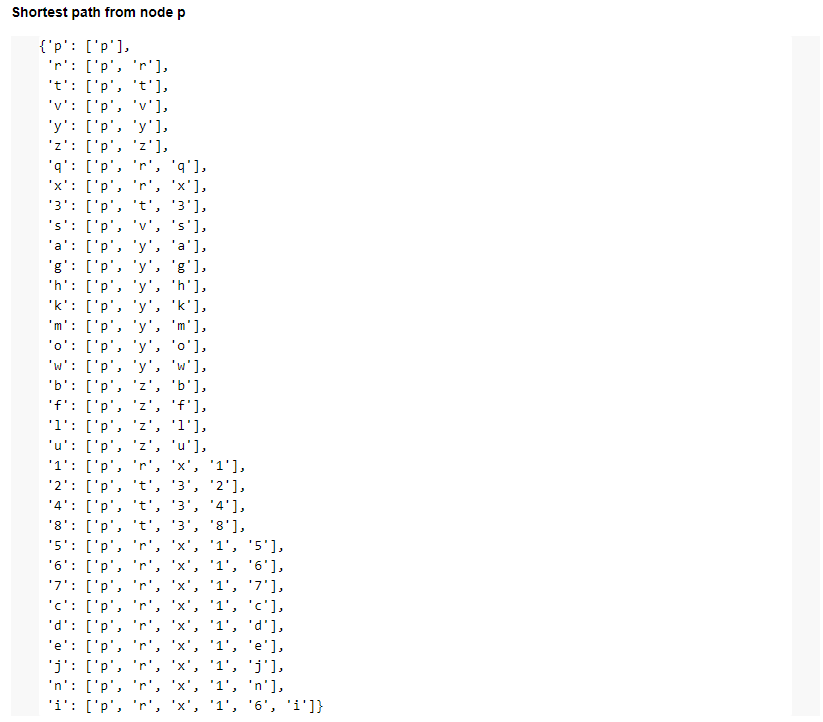
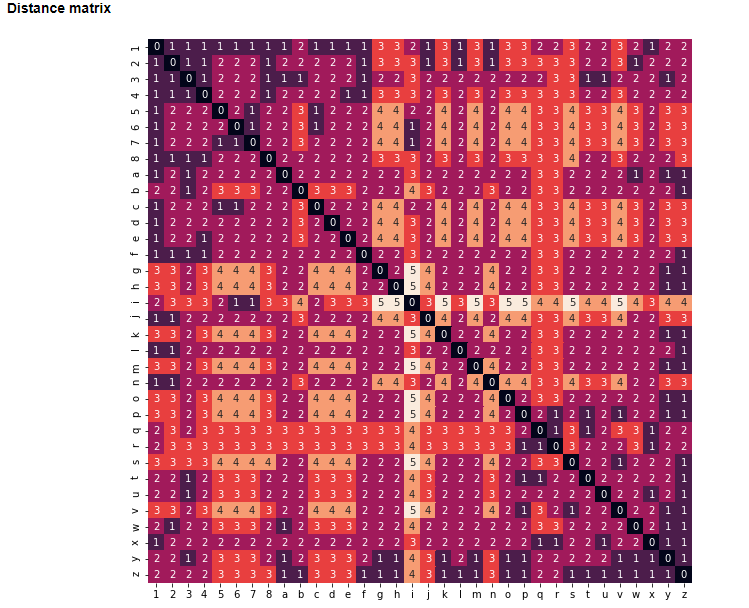

In [ ]:
#function to generate the simulation from any given node and get the shortests distances from that node to other nodes
def simulation(n = 100, start_node = 'p'):
  paths = [] #array to store all paths walked
  distances = [] #and the distances to help us build the Distance Matrix
  sum = 0
  for i in range(n): #loop
    n_steps, nodes = random_walk(start_node) #we generate our random walk
    sum += n_steps
    if (nodes): #if the node is not empty then we store that path
      paths.append(nodes)

  avg_steps = sum / n

  print('Shortests Paths From Node ', {start_node})

  for letter in sorted(list(G.nodes)): #loop to get the shortest path
    shortest_paths = [] #array to store the shortest path walked
    shortest_walk = 7 #array to store the distance of the shortest path
    for i in paths: #loop to check the shortest distance
      if letter == i[-1]: #if the last node from the path is equal to the letter {x} then we do the following:
        if (len(i) - 1 < shortest_walk): #we check if the length of the walk is the shortest
          shortest_walk = len(i) - 1 #if it is then we set that new value
          shortest_paths = i #and set the shortest path
    distances.append(shortest_walk) #and store the distance in the array
    print({letter}, ':', shortest_walk, shortest_paths) #We just print the shortest path from the {x} letter
  print('Average Steps: ', avg_steps)
  return distances #we return our distances

In [ ]:
Matrix_Distances = simulation(1000000, 'p')

Shortests Paths From Node  {'p'}
{'1'} : 3 ['p', 't', '3', '1']
{'2'} : 3 ['p', 't', '3', '2']
{'3'} : 2 ['p', 'y', '3']
{'4'} : 3 ['p', 't', '3', '4']
{'5'} : 4 ['p', 'z', 'l', '1', '5']
{'6'} : 4 ['p', 'y', 'x', '1', '6']
{'7'} : 4 ['p', 'y', '3', '1', '7']
{'8'} : 3 ['p', 't', '3', '8']
{'a'} : 2 ['p', 'y', 'a']
{'b'} : 2 ['p', 'z', 'b']
{'c'} : 4 ['p', 'y', 'x', '1', 'c']
{'d'} : 4 ['p', 'r', 'x', '1', 'd']
{'e'} : 4 ['p', 'z', 'x', '1', 'e']
{'f'} : 2 ['p', 'z', 'f']
{'g'} : 2 ['p', 'y', 'g']
{'h'} : 2 ['p', 'y', 'h']
{'i'} : 5 ['p', 'y', 'x', '1', '6', 'i']
{'j'} : 4 ['p', 'z', 'l', '1', 'j']
{'k'} : 2 ['p', 'y', 'k']
{'l'} : 2 ['p', 'z', 'l']
{'m'} : 2 ['p', 'y', 'm']
{'n'} : 4 ['p', 'y', 'x', '1', 'n']
{'o'} : 2 ['p', 'y', 'o']
{'p'} : 0 ['p']
{'q'} : 2 ['p', 't', 'q']
{'r'} : 1 ['p', 'r']
{'s'} : 2 ['p', 'v', 's']
{'t'} : 1 ['p', 't']
{'u'} : 2 ['p', 'z', 'u']
{'v'} : 1 ['p', 'v']
{'w'} : 2 ['p', 'z', 'w']
{'x'} : 2 ['p', 'r', 'x']
{'y'} : 1 ['p', 'y']
{'z'} : 1 ['p', 'z']
Ave

Shortests Paths From Node  {'1'}
{'1'} : 0 ['1']
{'2'} : 1 ['1', '2']
{'3'} : 1 ['1', '3']
{'4'} : 1 ['1', '4']
{'5'} : 1 ['1', '5']
{'6'} : 1 ['1', '6']
{'7'} : 1 ['1', '7']
{'8'} : 1 ['1', '8']
{'a'} : 1 ['1', 'a']
{'b'} : 2 ['1', '3', 'b']
{'c'} : 1 ['1', 'c']
{'d'} : 1 ['1', 'd']
{'e'} : 1 ['1', 'e']
{'f'} : 1 ['1', 'f']
{'g'} : 3 ['1', 'x', 'y', 'g']
{'h'} : 3 ['1', 'a', 'z', 'h']
{'i'} : 2 ['1', '6', 'i']
{'j'} : 1 ['1', 'j']
{'k'} : 3 ['1', 'a', 'y', 'k']
{'l'} : 1 ['1', 'l']
{'m'} : 3 ['1', 'f', 'z', 'm']
{'n'} : 1 ['1', 'n']
{'o'} : 3 ['1', 'x', 'z', 'o']
{'p'} : 3 ['1', 'x', 'y', 'p']
{'q'} : 2 ['1', 'x', 'q']
{'r'} : 2 ['1', 'x', 'r']
{'s'} : 3 ['1', 'l', 'z', 's']
{'t'} : 2 ['1', '3', 't']
{'u'} : 2 ['1', '3', 'u']
{'v'} : 3 ['1', 'a', 'y', 'v']
{'w'} : 2 ['1', 'a', 'w']
{'x'} : 1 ['1', 'x']
{'y'} : 2 ['1', 'x', 'y']
{'z'} : 2 ['1', 'f', 'z']
Average Steps:  5.310819
Shortests Paths From Node  {'2'}
{'1'} : 1 ['2', '1']
{'2'} : 0 ['2']
{'3'} : 1 ['2', '3']
{'4'} : 1 ['2', '

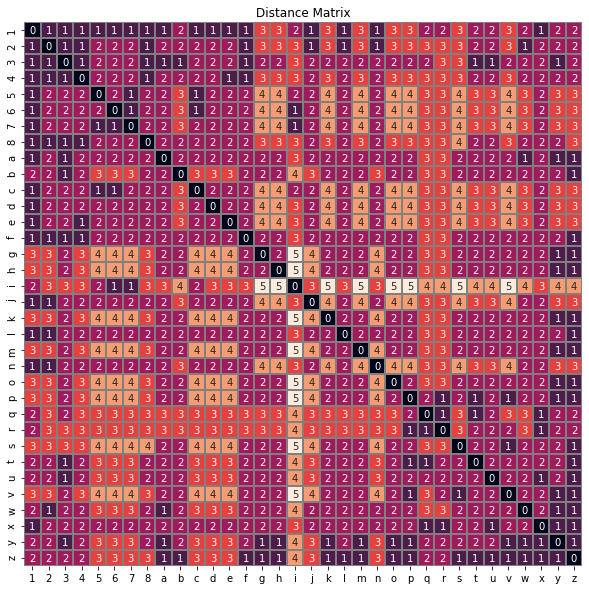

In [ ]:
#Here we graph our Distances Matrix using Seaborn HeatMap
Matrix_distances = []  #we Store all distances here
for letter in sorted(list(G.nodes)):
  Matrix_distances.append(simulation(1000000, letter)) #using our simulations generated distances from every node we store that value

df_Matrix = pd.DataFrame(data = Matrix_distances, index = sorted(list(G.nodes)), columns = sorted(list(G.nodes))) #We transform our Array Matrix into a dataframe to help us plot

#the we plot every Distances from the matrix
plt.figure(figsize=(10,10))
plt.title('Distance Matrix')
sns.heatmap(df_Matrix, cbar=False, linecolor='gray', linewidths=1, annot=True)

#(5%): Return importance of edges.
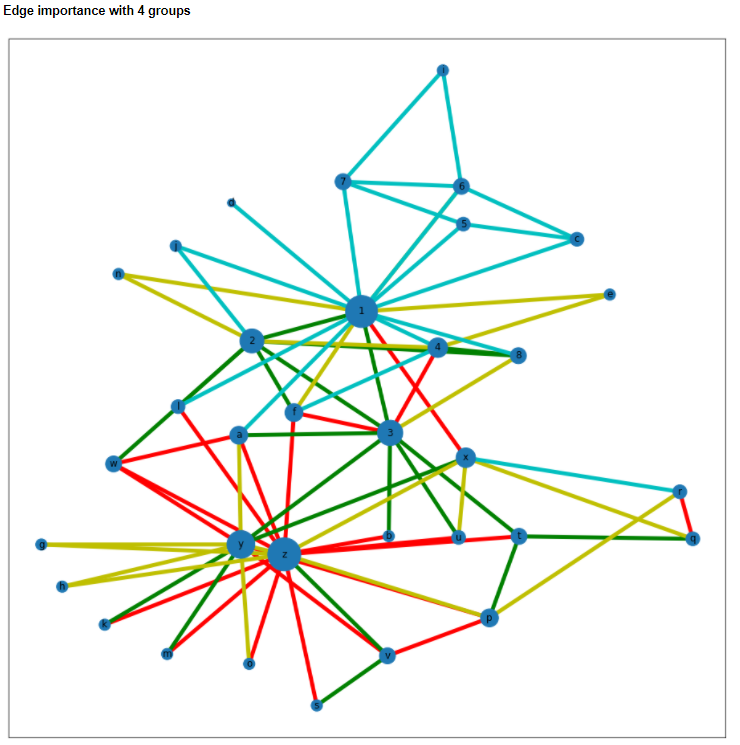

In [ ]:
#function to get the edge of importance
def Edges_Of_Importance(n = 100):
  paths = []
  all_connections = []

  counts = [0] * 156
  #add all paths from simulation
  for letter in sorted(list(G.nodes)): #we get the paths generated from the random walk from every node
    for i in range(n): #loop
      n_steps, nodes = random_walk(letter) #generate our random walk
      if (nodes): #save that path if it is not empty
        paths.append(nodes)

  #add all connections to list
  for letter in sorted(list(G.nodes)): #then we add all connections that node has
    for i in list(G.neighbors(letter)):
      all_connections.append((letter, i))

  #count edge importance
  index = 0
  for j in all_connections: #we count the edge importance depending if it appears in our path
    for i in np.unique(paths): #for every i in our paths generated from our simulation
      for k, v in zip(i[0::2], i[1::2]): #we get a pair from our paths
        if (k, v) == j: #then we check if that pair exists
          counts[index] += 1 #increments our count
    index += 1

  print(counts)

  #graph the edge of importance
  EG = nx.Graph() #we create a new graph
  for j in range(len(all_connections)): #for every connection we add an edge
    if (counts[j] >= 340 and counts[j] < 380): #depending the way it appears in the simulation we add a color group (340, 380)
      EG.add_edge(*all_connections[j], color='green')
    elif (counts[j] >= 380 and counts[j] < 420): #depending the way it appears in the simulation we add a color group (380, 420)
      EG.add_edge(*all_connections[j], color='red')
    elif (counts[j] >= 420 and counts[j] < 500): #depending the way it appears in the simulation we add a color group (420, 500)
      EG.add_edge(*all_connections[j], color='cyan')
    elif (counts[j] >= 500 and counts[j] < 600): #depending the way it appears in the simulation we add a color group (500, 600)
      EG.add_edge(*all_connections[j], color='yellow')

  #we plot our Graph with Kamada Layout and depending the edges' color

  plt.figure(figsize=(10,10))
  plt.title('Edge Of Importance')
  pos = nx.kamada_kawai_layout(EG)

  edges = EG.edges()
  colors = [EG[u][v]['color'] for u,v in edges]
  nx.draw_kamada_kawai(EG, edge_color=colors, with_labels=True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


[387, 432, 396, 413, 429, 413, 424, 412, 386, 384, 380, 384, 389, 382, 349, 423, 446, 448, 425, 477, 438, 406, 428, 412, 431, 462, 475, 491, 451, 484, 475, 429, 447, 481, 444, 516, 484, 506, 456, 480, 505, 562, 509, 468, 498, 433, 454, 425, 472, 458, 462, 423, 540, 589, 566, 532, 582, 604, 553, 548, 612, 608, 594, 535, 496, 479, 642, 577, 550, 584, 563, 565, 568, 569, 638, 660, 606, 648, 482, 464, 639, 571, 607, 681, 611, 638, 603, 634, 666, 588, 596, 654, 612, 471, 483, 511, 537, 504, 449, 461, 501, 451, 424, 493, 546, 600, 526, 505, 507, 563, 548, 564, 568, 526, 464, 583, 563, 575, 554, 596, 599, 593, 493, 510, 495, 547, 585, 415, 406, 424, 375, 376, 427, 380, 389, 397, 396, 385, 394, 394, 345, 377, 369, 386, 367, 364, 386, 383, 363, 370, 370, 370, 369, 381, 381, 421]


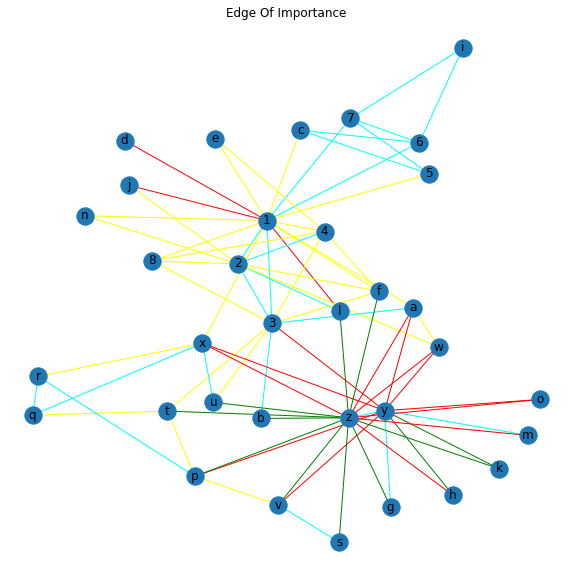

In [ ]:
Edges_Of_Importance(1000)